<center>
<img src = 'foto_back.jpg' height='100'>
</center>

<div style = "height: 10px; width:100%; background-color:#0070C0;"></div>

# Aproximação de distribuições
<i>uma aplicação de funções geradoras de momentos na redução da complexidade de tempo no cálculo de probabilidades.</i>

## Conteúdo
* [Introdução](#chapter1)
* [Problema](#chapter2)
* [Modelagem](#chapter3)
* [Função geradora de momentos](#chapter4)
* [Modelagem alternativa](#chapter5)
* [Convergência de funções geradoras de momentos](#chapter6)
* [Conclusão](#chapter7)
--- 

<div style="width: 100%; height: 2px; background-image: linear-gradient(to right, #0070C0, white);"></div>

## Introdução <a class="anchor" id="chapter1"></a>
Quando realizamos um experimento aleatório e desejamos realizar inferências sobre a variável aleatória em questão, é mandatório que ela seja modelada segundo uma distribuição bem definida. No entanto, nem sempre variáveis aleatórias serão tão bem comportadas ao ponto de se ajustarem a uma função perfeitamente.
Nesse sentido, é preciso realizarmos aproximações para modelar a distribuição de uma variável aleatória de modo que ela melhor se ajuste num modelo teórico conhecido. Evidentemente, a escolha do modelo pode ser mais ou menos complexa, a depender de diversos critérios, como por exemplo minimizar o erro quadrático médio.

Agora considere uma simulação onde diversas distribuições foram usadas para modelar um experimento aleatório. Ao final dessa simulação, cada distribuição vem acompanhada do erro quadrático médio (root mean square,rms) e uma decisão precisa ser feita: qual modelo utilizaremos?
Se o critério mor for minimizar o erro de ajuste, então basta escolher o modelo com menor erro. No entanto, há um preço a ser pago que se manteve escondido em toda a discussão acima: custo computacional. O trade-off entre minimizar erros de ajuste e aumento do custo computacional deve ser levado em consideração, sobretudo quando os recursos são limitados.

Para ilustrar a discussão acima, proponho a seguinte análise de um problema envolvendo modelagem da distribuição de probabilidades de um experimento aleatório. Em seguida, usaremos algumas definições e teoremas que nos permitem substituir distribuições complexas por outras mais simples, preservando a minimização do erro de ajuste e menor custo computacional.

<div style="width: 100%; height: 2px; background-image: linear-gradient(to right,#0070C0, white);"></div>

## Problema <a class="anchor" id="chapter2"></a>
Uma empresa de <i>e-commerce</i> está passando por períodos de dificuldade nas vendas de determi-nado produto em seu site. O grande volume de visitantes da página que realiza as vendas do produto é acompanhado de uma baixa conversão  – isto é, muitos usuários acessam a página, mas poucos adquirem o produto. De posse do histórico de usuários e quantidade de conversões realizadas num dado período de tempo, deseja-se modelar a probabilidade de compra por parte dos usuários deste produto.


<div style="width: 100%; height: 2px; background-image: linear-gradient(to right,#0070C0, white);"></div>

## Modelagem <a class="anchor" id="chapter3"></a>
O problema acima se enquadra na categoria de experimentos aleatórios do tipo “sucesso/fracasso”. Situações dessa natureza admitem modelagem da distribuição de probabilidades sendo binomial, isto é: podemos criar um modelo capaz de nos dar a probabilidade de um $k$ clientes que visitam a página efetuarem a compra deste produto.

Suponha que $n$ clientes visitaram a página durante um certo período de tempo e que somente $k$ deles ($k≪n$) efetuaram a compra. Admitindo que a probabilidade de um cliente efetuar a compra seja p≪1 e que a decisão de um usuário sobre comprar ou não o produto não influencia na decisão dos demais.

$$
\text{F, F, F, S ... F, F, S, F,F}
$$

Representando como $\text{S}$ (sucesso) o cliente que efetou a compra e $\text{F}$ (fracasso) o cliente que acessou a página mas não realizou a compra, a probabilidade do evento acima $P(X=k)$ ocorrer é:

$$
P(X=k)=(n,x) p^k (1-p)^{n-k}
$$

In [1]:
# Pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# LaTeX
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "latinmodern-math",
    "text.latex.preamble": r"\usepackage{amsmath}",
})

Parâmetros da distribuição binomial assumindo $X  \text{~bin}(n,p)$ com probabilidade de sucesso, $p$, igual a 0.1

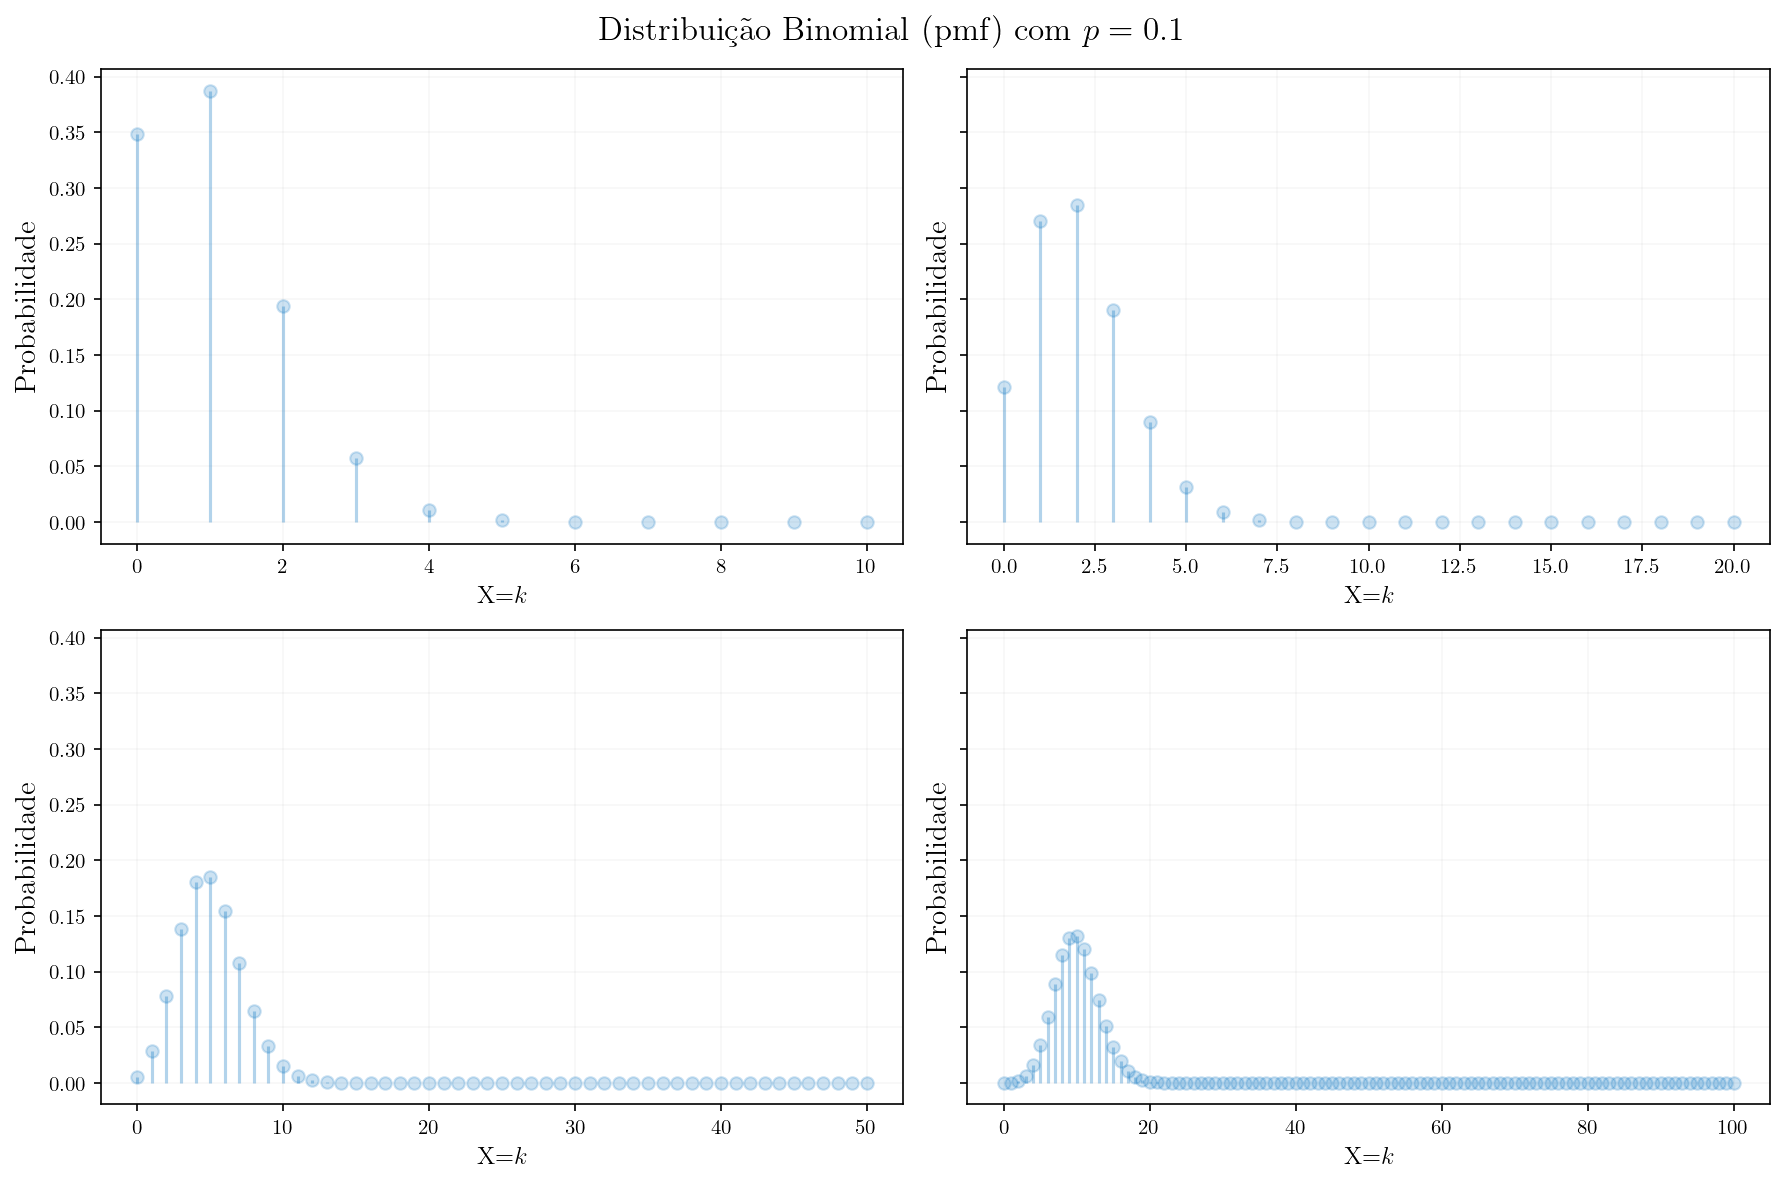

In [2]:
# Valores de p e n para cada gráfico
n_values = [10, 20, 50, 100]
p_values = [0.1, 0.1, 0.1, 0.1]

# Define número de gráficos e título
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi = 150, sharey=True)
fig.suptitle(r'Distribuição Binomial (pmf) com $p=0.1$', fontsize=16)

for ax, n, p in zip(axes.flat, n_values, p_values):
    
    # Cria os valores exibidos no eixo x - realizações da variável aleatória
    x = np.arange(0, n + 1)
    
    # Calcula as probabilidades para distribuição binomial
    binomial_probabilities = binom.pmf(x, n, p)
    
    # Plota gráfico da distribuição binomial
    stem = ax.stem(x, binomial_probabilities, linefmt='#0070C0', markerfmt='o', basefmt=' ')
    
    # Adjust the alpha value of the stem lines
    stem[0].set_alpha(0.2)
    stem[1].set_alpha(0.3)
    
    ax.set_xlabel(r'X=$k$', fontsize=12)
    ax.set_ylabel('Probabilidade', fontsize=14)
    ax.grid(True, alpha=0.1)

plt.tight_layout()
plt.show()

O modelo acima se ajusta muito bem ao experimento aleatório em questão, mas ainda não sabemos o custo computacional associado ao cálculo das probabilidades acima. Isso porque um algoritmo (ingênuo) capaz de computar as probabilidades acima tem complexidade de tempo $\mathcal{O}(n)$, uma vez que o cálculo do coeficiente binomial $(n,p)$ e as potências envolvidas tem complexidade $\mathcal{O}(n)$.

<div class="alert alert-block alert-info">  
    De fato, há outros algoritmos mais eficientes para o cálculo das probabilidades, que podem reduzir a complexidade para até $\mathcal{O}(k)$.
</div>

<div style="width: 100%; height: 2px; background-image: linear-gradient(to right,#0070C0, white);"></div>

## Funções geradoras de momentos <a class="anchor" id="chapter4"></a>
De posse do gráfico da distribuição binomial acima, uma pergunta razoável paira: sob certas condições, não seria possível aproximar a distribuição binomial por outra cujas computações das probabilidades sejam mais simples? Isto é, que minimizem a complexidade de tempo do algoritmo que realiza essas operações. 

Para isso, vamos nos apoiar sob o seguinte teorema:

> <b>Teorema</b> 
Sejam $F_X (x)$ e $F_Y (y)$ duas funções de distribuição cumulativa (CDFs) para as quais todos os momentos existem. Se as funções geradoras de momentos existirem e $M_X (t)= M_Y (t)$ para todos os t em alguma vizinhança de 0, então 

$$
F_X (u)= F_Y (u), \forall u
$$

O teorema acima apresenta uma ferramenta poderosa, que nos permite – grosso modo - afir-mar que quando duas funções geradoras de momentos existirem e forem iguais, então as distri-buições de probabilidades também serão iguais. 

Uma vez enunciado o teorema acima, podemos pensar se existem distribuições mais simples que, sob determinadas condições, poderiam substituir o modelo binomial.

<div style="width: 100%; height: 2px; background-image: linear-gradient(to right,#0070C0, white);"></div>

## Modelagem alternativa  <a class="anchor" id="chapter5"></a>
Considere a função de massa de probabilidade referente a distribuição de Poisson cuja expres-são é dada por:

$$
P(X=k)=\frac{e^{-\lambda}\lambda^k}{k!},\ x=0,1,2,\ldots
$$

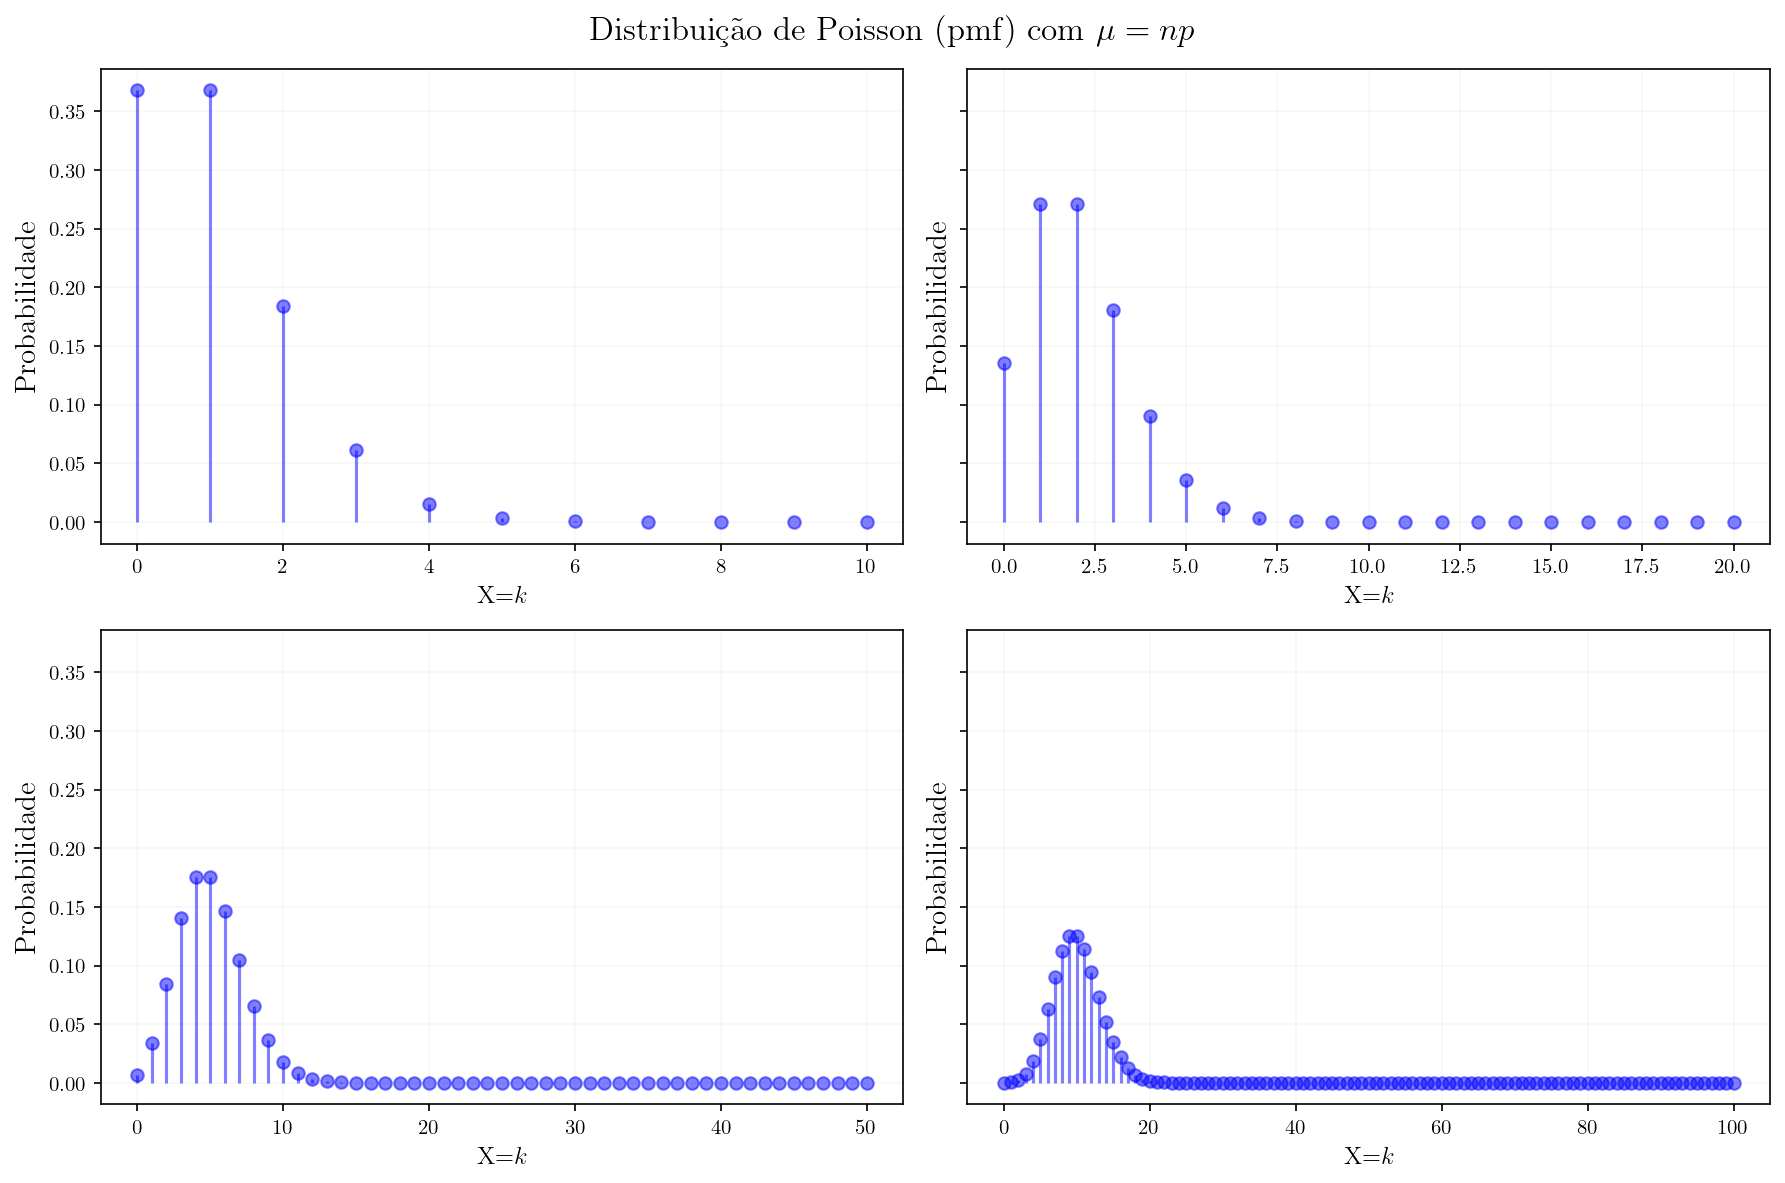

In [3]:
# Define número de gráficos e título
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=150, sharey=True)
fig.suptitle('Distribuição de Poisson (pmf) com $\mu=np$', fontsize=16)

for ax, n, p in zip(axes.flat, n_values, p_values):
    
    # Cria os valores exibidos no eixo x - realizações da variável aleatória
    x = np.arange(0, n + 1)
    
    # Calcula as probabilidades para distribuição de Poisson
    mu = n * p
    poisson_probabilities = poisson.pmf(x, mu)
    
    # Plota gráfico da distribuição de Poisson
    stem = ax.stem(x, poisson_probabilities, linefmt='blue', markerfmt='o', basefmt=' ')
    
    # Adjust the alpha value of the stem lines
    stem[0].set_alpha(0.5)
    stem[1].set_alpha(0.5)
    
    ax.set_xlabel(r'X=$k$', fontsize=12)
    ax.set_ylabel('Probabilidade', fontsize=14)
    ax.grid(True, alpha=0.1)

plt.tight_layout()
plt.show()


De imediato, é possível notar que ao passo que a distribuição binomial possui dois parâmetros ($n$ e $p$), a distribuição de Poisson tem somente um $\lambda$. Além disso, os termos que compõem a pmf de Poisson são mais simples de serem calculados em relação aos termos da pmf binomial.

A complexidade de tempo para calcular $e^{-\lambda} {\lambda}^k$  é $\mathcal{O}(1)$, pois envolve apenas operações exponenciais e multiplicação, que são operações de tempo constante. Já o cálculo de $k!$ é mais complexo e pode ser feito de várias maneiras. A abordagem mais bruta seria calcular $k!$ multiplicando todos os inteiros de 1 a $k$. Isso teria uma complexidade de tempo de $\mathcal{O}(k)$, já que há $k$ multiplicadores.

<div class="alert alert-block alert-info">  
    No entanto, há maneiras mais eficientes de calcular $k!$, como a utilização de tabelas de fatoriais pré-calculados ou algoritmos mais sofisticados como o algoritmo de Stirling para aproximar fatoriais. Esses métodos podem reduzir a complexidade de tempo para algo próximo a  $\mathcal{O}(1)$, ou  $\mathcal{O}(\text{log}k)$, dependendo da implementação específica.
</div>


<div style="width: 100%; height: 2px; background-image: linear-gradient(to right,#0070C0, white);"></div>

## Convergência de funções geradoras de momentos <a class="anchor" id="chapter6"></a>
Agora vamos calcular as funções geradoras de momentos, $M_X (t)$, para as duas distribuições anteriores:

### $X~\text{Binomial} (n,p)$

Quando $n$ é grande e $np$ é pequeno, podemos usar a expansão de Taylor da função $(1-p+pe^t)^n$ em torno de $t=0$ para aproximá-la:

$$
M_X (t)=(1-p+pe^t)^n\approx(1+np(e^{t}-1))^n
$$

Agora, expandindo essa expressão usando a fórmula do binômio de Newton, obtemos:

$$
1+np(e^{t}-1))^n\approx e^{np(e^{t}-1)} \Rightarrow M_X (t)\approx e^{np(e^{t}-1)}
$$

### $X\text{~Poisson} (\lambda)$
Já para distribuição de Poisson, faremos $\lambda=np$ que, de acordo com a descrição do problema, é muito pequeno. Substituindo, obtemos:

$$
M_Y (t)=e^{{\lambda}{(e^{t}-1)}} =e^{np(e^{t}-1)} 
$$
Para as condições aplicadas, repare que as funções geradoras de momentos de ambas as distribuições é a mesma. O uso desse teorema nos assegura do palpite de que as distribuições eram iguais quando analisávamos o gráfico das duas.
Os gráficos anteriores foram obtidos fixando um valor para probabilidade p=0.1 e aumentando somente a quantidade de usuários que visitam a página n. Agora vamos ver o efeito sobre um mesmo número de visitantes n=100 e aumentamos a probabilidade.

Para as condições aplicadas, repare que as funções geradoras de momentos de ambas as distribuições é a mesma. O uso desse teorema nos assegura do palpite de que as distribuições eram iguais quando analisávamos o gráfico das duas.

Os gráficos anteriores foram obtidos fixando um valor para probabilidade $p=0.1$ e aumentando somente a quantidade de usuários que visitam a página $n$. Agora vamos ver o efeito sobre um mesmo número de visitantes $n=100$ e aumentamos a probabilidade


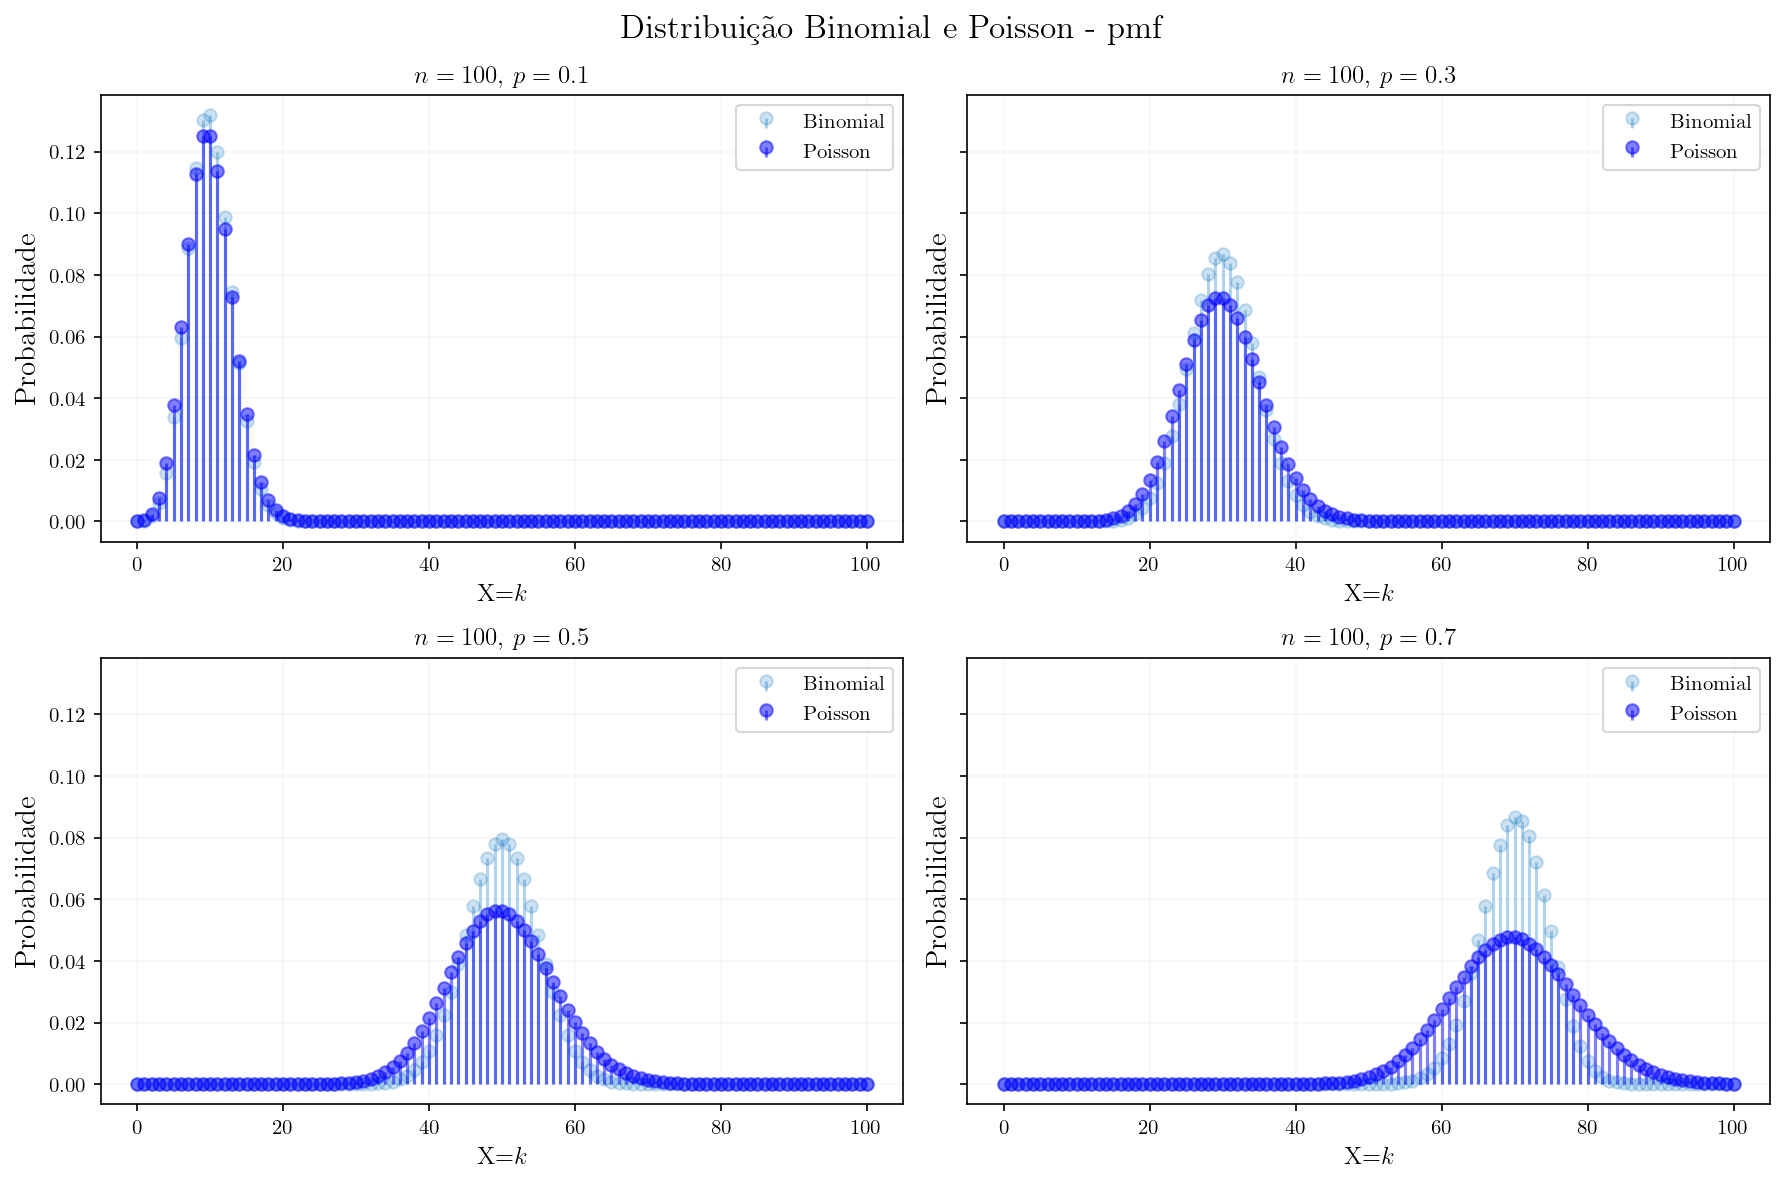

In [4]:
# Valores de p e n para cada gráfico
n_values = [100, 100, 100, 100]
p_values = [0.1, 0.3, 0.5, 0.7]

# Define número de gráficos e título
fig, axes = plt.subplots(2, 2, figsize=(12, 8), dpi=150, sharey=True)
fig.suptitle('Distribuição Binomial e Poisson - pmf', fontsize=16)

for ax, n, p in zip(axes.flat, n_values, p_values):
    
    # Cria os valores exibidos no eixo x - realizações da variável aleatória
    x = np.arange(0, n + 1)
    
    # Calcula as probabilidades para distribuição binomial
    binomial_probabilities = binom.pmf(x, n, p)
    
    # Calcula as probabilidades para distribuição de Poisson
    mu = n * p
    poisson_probabilities = poisson.pmf(x, mu)
    
    # Plota gráfico da distribuição binomial
    binomial_stem = ax.stem(x, binomial_probabilities, linefmt='#0070C0', markerfmt='o', basefmt=' ', label='Binomial')
    
    # Plota gráfico da distribuição de Poisson
    poisson_stem = ax.stem(x, poisson_probabilities, linefmt='blue', markerfmt='o', basefmt=' ', label='Poisson')
    
    # Ajusta opacidade das retas
    binomial_stem[0].set_alpha(0.2)
    binomial_stem[1].set_alpha(0.3)
    poisson_stem[0].set_alpha(0.5)
    poisson_stem[1].set_alpha(0.5)
    
    ax.set_title(r'$n={}$, $p={}$'.format(n, p))
    ax.set_xlabel(r'X=$k$', fontsize=12)
    ax.set_ylabel('Probabilidade', fontsize=14)
    ax.grid(True, alpha=0.1)
    ax.legend()

plt.tight_layout()
plt.show()


Nos gráficos acima, reparamos que fixando o número de realizações e aumentando a probabilidade da compra ser realizada, as distribuições começam a divergir. Isso é esperado, uma vez que o critério $np$ pequeno não foi satisfeito.

<div style="width: 100%; height: 2px; background-image: linear-gradient(to right,#0070C0, white);"></div>

## Conclusão <a class="anchor" id="chapter7"></a>
Ao simular os tempos no cálculo de cada probabilidade usando o `scipy.stats` e a função `time`, obtivemos o seguinte gráfico:

In [5]:
# Função que mede tempo de execução
import time

Vamos construir funções que calulam o tempo de execução do algoritmo que computa a pmf das distribuições

In [6]:
def tempo_binomial(n_values, p):
    tempos = []
    for n in n_values:
        t_inicial = time.time()
        binom.pmf(np.arange(n + 1), n, p)
        t_final = time.time()
        tempos.append(t_final - t_inicial)
    return tempos

In [7]:
def tempo_poisson(n_values, mu):
    tempos = []
    for n in n_values:
        t_inicial = time.time()
        poisson.pmf(np.arange(n + 1), mu)
        t_final = time.time()
        tempos.append(t_final - t_inicial)
    return tempos

In [8]:
# Define os valores dos parâmetros das distribuições para simular os tempos de execução
n_values = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7
           ]
p = 0.1
mu = 100 * p

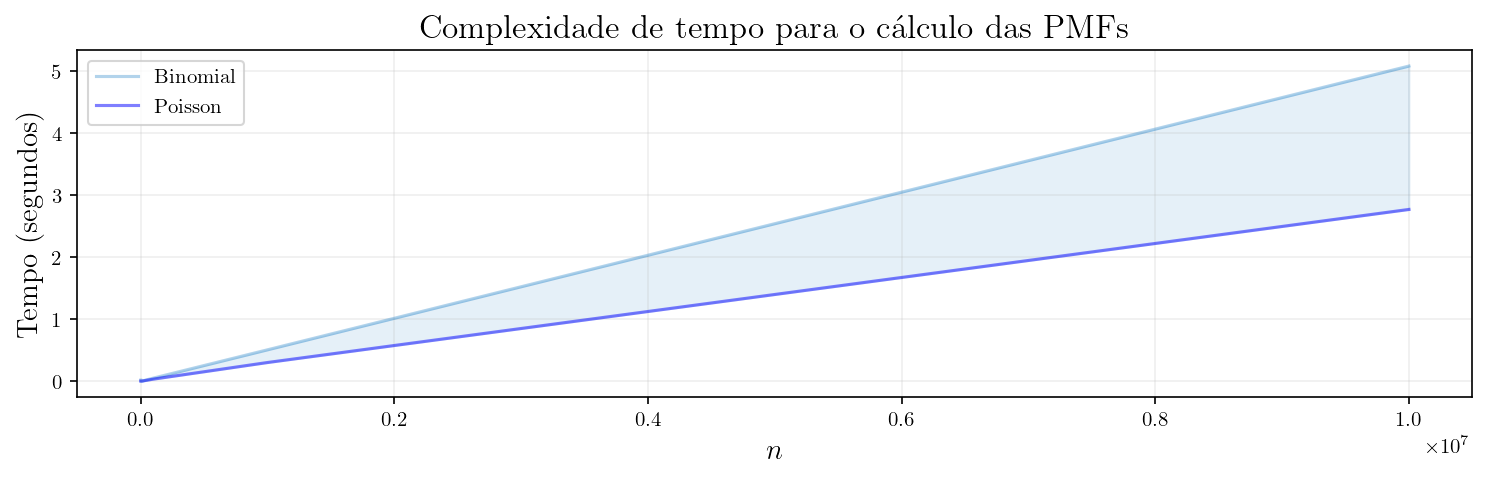

In [9]:
# Mede tempo de execução para computar as probabilidades da distribuição binomial
binomial_tempos = tempo_binomial(n_values, p)

# Mede tempo de execução para computar as probabilidades da distribuição de Poisson
poisson_tempos = tempo_poisson(n_values, mu)

# Exibe gráfico com a complexidade de tempo.
plt.figure(figsize=(12, 3), dpi=150)
plt.plot(n_values, binomial_tempos, label='Binomial', color='#0070C0',alpha=0.3)
plt.plot(n_values, poisson_tempos, label='Poisson', color='blue',alpha=0.5)

plt.fill_between(n_values, binomial_tempos, poisson_tempos, color='#0070C0', alpha=0.1)

plt.title('Complexidade de tempo para o cálculo das PMFs', fontsize=16)
plt.xlabel(r'$n$', fontsize=14)
plt.ylabel('Tempo (segundos)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()

O gráfico acima destaca a grande diferença entre utilizar distribuições de Poisson a distribuições binomiais para o cálculo das probabilidades. Por fim, enfatizamos que se determinadas condições forem satisfeitas, podemos aproximar as duas distribuições de modo a economizar recursos computacionais e obter os mesmos resultados que modelam um mesmo experimento, afinal, como previsto teoricamente:

$$
\mathcal{O}(1)<\mathcal{O}(\text{log}n)<\mathcal{O}(n)
$$


De acordo com a conclusão acima, fica claro que, quando possível a substituição de distribuições complexas por outras mais simples afeta substancialmente o tempo de execução do algortimo que calcula as probabilidades de uma variável aleatória.

A validade do teorema da convergência de funções geradores de momentos pode ser utilizado a fim de tornar algoritmos de Machine Learning que se baseiam em modelos binomiais, como o classificador Baysiano ingênuo e, potencialmente, o classificador Baysiano multinomial.